# Function Types in Neural Networks:
## What's What with Activation, Non-linearity, Transfer, Cost, and Loss Functions

### Intro

One of the most challenging aspects of Machine Learning at the begining is trying to resolve the confusion surrounding various functions, especially their names and applications. In neural networks we usually use functions for two purposes:

1. Transfer weights from one layer to the next.

2. Minimize the loss (also known as cost).

The first type is interchangeably called activation, non-linearity or transfer function, which basically adds non-linearity to the input values through application to input (or output of the previous layer), weights and biases. Without an activation function between the layers, we will have linear transformation between layers, and therefore, multiple layers won't perform any better than a single layer.

The second type, called cost or loss function, is usually applied to the last layer in combination with an optimization method and/or backpropagation in order to find the weights that minimize the loss/cost. Different functions have different properties and are chosen based on the structure of the network as well as the task at hand. For example, the activation function used for the last layer is different from that chosen for previous layers. In regression tasks, for instance, sigmoid or tanh activation functions are recommended over softmax function for the last layer (because the desired result must be between 0 and 1).

### Activation Functions

__sigmoid__: the most widely used continuous and smooth activation function. Recommended for last layer's non-linearity in regression tasks. Ranges between 0 and 1.
> Computes sigmoid of x element-wise: specifically, y = 1 / (1 + exp(-x)).

__tanh__: or hyper tangent is another continuous and smooth activation function with a range between -1 and 1.
> Computes hyperbolic tangent of x element-wise.

__softmax__: or normalized exponential function is a generalization of the logistic function that transforms a K-dimensional vector of arbitrary real values to a K-dimensional vector of real values in the range (0, 1) that add up to 1. It is recommended for last layer's non-linearity in classification tasks.
> Computes softmax activations. For each batch i and class j we have:
softmax[i, j] = exp(logits[i, j]) / sum_j(exp(logits[i, j]))

__ReLU__: Rectified Linear Unit is the current dominant non-linearity function for layers prior to the last one, because unlike sigmoid function it doesn't saturate and is also faster to compute.
> Computes rectified linear: max(features, 0)


In [1]:
# Load libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#### Activation Functions from TensorFlow

In [2]:
# Generate some data
X = np.linspace(start=-5., stop=5., num=50)

In [3]:
# Create activation functions
f_sigm = tf.nn.sigmoid(X)  # sigmoid function
f_tanh = tf.nn.tanh(X)     # tanh function
f_relu = tf.nn.relu(X)     # ReLU function
f_soft = tf.nn.softmax(X)

In [4]:
# Start the graph
with tf.Session() as sess:
    # Run session & fetch values from activation functions
    sigm_v, tanh_v, relu_v, soft_v = sess.run([f_sigm, f_tanh, f_relu, f_soft])

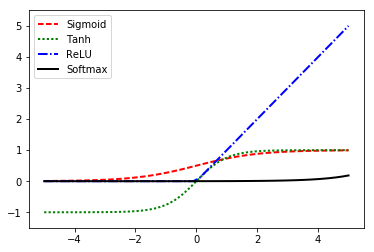

In [5]:
# Plot fetches
plt.plot(X, sigm_v, 'r--', label='Sigmoid', linewidth=2)
plt.plot(X, tanh_v, 'g:', label='Tanh', linewidth=2)
plt.plot(X, relu_v, 'b-.', label='ReLU', linewidth=2)
plt.plot(X, soft_v, 'k', label='Softmax', linewidth=2)
plt.ylim([min(tanh_v)-0.5, max(relu_v)+0.5])
plt.legend(loc='upper left')
plt.show()

#### Other notable activation functions  with brief description from TensorFlow

In [ ]:
# ReLU6: limit the top to 6: min(max(features, 0), 6)
f_relu6 = tf.nn.relu6(X)

# Concatenated ReLU.
# Concatenates a ReLU which selects only the positive part of the activation with
# a ReLU which selects only the negative part of the activation.
# Note that as a result this non-linearity doubles the depth of the activations.
f_crelu = tf.nn.crelu(X)

# Dropout
f_dropout = tf.nn.dropout(X, keep_prob=0.5)

# SoftSign: features / (abs(features) + 1)
f_sign = tf.nn.softsign(X)

# SoftPlus: log(exp(features) + 1)
f_plus = tf.nn.softplus(X)

# Exponential linear unit: exp(features) - 1 if < 0, features otherwise
f_elu = tf.nn.elu(X)

---

### Cost functions

__Cross Entropy__: is a cost function that, similar to quadratic cost function, is positive and tends toward zero as the neuron gets better at computing the desired output for all training inputs. However, CE is much faster than quadratic cost function. It is recommended for classification tasks.
> Usually used with softmax to compute softmax cross entropy between logits and labels. Measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

__Squared Error__: is sum of squared errors between the predicted value and the actual value and recommended as cost function for regression tasks.
> Also known as L2 loss, measures error between two tensors, or between a tensor and zero. These can be used for measuring accuracy of a network in a regression task or for regularization purposes (weight decay).

#### Cost function implementation with TensorFlow

In [21]:
# Generate some input for regression
X1 = tf.linspace(-5., 5., 100)
# Create the target value: 0 here.
Y1 = tf.constant(0.)

# Generate some input for classification
X2 = tf.linspace(-5., 5., 100)
# Target
Y2 = tf.fill([100,], 1.)

In [22]:
# Squared Error, also known as L2 loss
f_l2 = tf.nn.l2_loss(Y1 - X1)

# Cross entropy loss
f_softce = tf.nn.softmax_cross_entropy_with_logits(logits=X2, labels=Y2)

In [23]:
# Start the graph
with tf.Session() as sess:
    # Run session & fetch values from cost functions
    l2_v, softce_v = sess.run([f_l2, f_softce])

In [24]:
l2_v

425.08414

In [25]:
softce_v

734.25732

#### Other notable cost functions with brief description from TensorFlow

In [ ]:
# Measures the probability error in discrete classification tasks in which each class
# is independent and not mutually exclusive. For instance, multilabel classification.
f_sigmoid_xent = tf.nn.sigmoid_cross_entropy_with_logits(labels, logits)

# Measures the probability error in discrete classification tasks in which the
# classes are mutually exclusive (each entry is in exactly one class).
f_sparse_zent = tf.nn.sparse_softmax_cross_entropy_with_logits(labels, logits)

# This is like f_sigmoid_xent except that pos_weight, allows one to trade off recall and
# precision by up- or down-weighting the cost of a positive error relative to a negative error,
# by multiplying it with the positive targets.
f_weighted_xent = tf.nn.weighted_cross_entropy_with_logits(targets, logits, pos_weight)